In [43]:
# Seed value for reproducibility
# Apparently you may use different seed values at each stage

seed_value= 123

import tensorflow as tf
import random as rn
import random

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('dark_background')
%matplotlib inline
import seaborn as sns
#sns.set_style('darkgrid')
import numpy as np

In [46]:
import tensorflow.keras
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten ,ZeroPadding2D
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv3D,MaxPooling3D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from scipy import ndimage

from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam,Adadelta, Adagrad
from tensorflow.keras import models
from tensorflow.keras import regularizers

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

from tensorflow.keras import activations
from tensorflow.keras import Model

from tensorflow.keras.layers import AvgPool2D, MaxPool2D, GlobalAvgPool2D
from tensorflow.keras.layers import Add, ReLU, Dense, concatenate

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add 

from tensorflow.keras.applications import VGG16,VGG19

In [1]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from statistics import mean, stdev 
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score


MODEL ARCHITECTURE

<img src="Modelpic.png">

In [7]:
#only T2tra, ADC, Bval
data =pd.read_csv("D:/MSCA/CAPSTONE/Experiment/Final.csv")

In [8]:
data.head(5)

,ProxID,Name,fid,pos,ijk,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,zone,ggg
0,ProstateX-0000,ep2d_diff_tra_DYNDISTCALC_BVAL0,1,25.7457 31.8707 -38.511,36 72 9,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDISTCALC_BVAL,PZ,3
1,ProstateX-0000,ep2d_diff_tra_DYNDIST_ADC0,1,25.7457 31.8707 -38.511,36 72 9,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_ADC,PZ,3
2,ProstateX-0000,t2_tse_tra0,1,25.7457 31.8707 -38.511,167 224 9,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,PZ,3
3,ProstateX-0001,t2_tse_tra0,1,-40.5367071921656 29.320722668457 -16.70766907...,157 186 10,3.0,"0.5,0.5,3",384x384x19x1,t2_tse_tra,AS,1
4,ProstateX-0001,ep2d_diff_tra_DYNDIST_MIX_ADC0,1,-40.5367071921656 29.320722668457 -16.70766907...,34 63 10,3.0,"2,2,3",84x128x19x1,ep2d_diff_tra_DYNDIST_MIX_ADC,AS,1


In [9]:
data.groupby('ggg').count()

,ProxID,Name,fid,pos,ijk,SpacingBetweenSlices,VoxelSpacing,Dim,DCMSerDescr,zone
ggg,,,,,,,,,,
1,108,108,108,108,108,108,108,108,108,108
2,123,123,123,123,123,123,123,123,123,123
3,60,60,60,60,60,60,60,60,60,60
4,24,24,24,24,24,24,24,24,24,24
5,21,21,21,21,21,21,21,21,21,21


In [76]:
#Patients with more than 1 lesion
(data['ProxID'].value_counts())[:13]

#There are 12 patients with more than 1 lesion(1 patient with 3 lesions- 3*3MRI sequences=9, Similarly 11 patients with 2 lesions )

ProstateX-0196    9
ProstateX-0173    6
ProstateX-0121    6
ProstateX-0031    6
ProstateX-0150    6
ProstateX-0122    6
ProstateX-0179    6
ProstateX-0005    6
ProstateX-0139    6
ProstateX-0199    6
ProstateX-0203    6
ProstateX-0002    6
ProstateX-0183    3
Name: ProxID, dtype: int64

## CONTRAST STRETCHING


In [48]:
t2_samples1 = np.load('D:/MSCA/CAPSTONE/Experiment/3D/Resized/Contra/order/t2tra/X_train_ijk.npy')
t2_labels1 = np.load('D:/MSCA/CAPSTONE/Experiment/3D/Resized/Contra/order/t2tra/Y_train_ijk.npy')

t2_samples2 = np.load('D:/MSCA/CAPSTONE/Experiment/3D/Resized/Contra/order/adc/X_train_ijk.npy')
t2_labels2 = np.load('D:/MSCA/CAPSTONE/Experiment/3D/Resized/Contra/order/adc/Y_train_ijk.npy')

t2_samples3 = np.load('D:/MSCA/CAPSTONE/Experiment/3D/Resized/Contra/order/bval/X_train_ijk.npy')
t2_labels3 = np.load('D:/MSCA/CAPSTONE/Experiment/3D/Resized/Contra/order/bval/Y_train_ijk.npy')

In [49]:
t2_samples1 = np.array(t2_samples1, dtype=np.float32, copy = True)
t2_samples2 = np.array(t2_samples2, dtype=np.float32, copy = True)
t2_samples3 = np.array(t2_samples3, dtype=np.float32, copy = True)

In [8]:
np.array_equal(t2_labels1,t2_labels3)  # T2 and bval are in same order---same patch same grade

True

In [9]:
np.array_equal(t2_labels1,t2_labels2) # T2 and adc are in same order---same patch same grade

True

In [50]:
from sklearn.model_selection import train_test_split
x_t2_train, x_t2_test, y_t2_train, y_t2_test = train_test_split(t2_samples1, t2_labels1, test_size=0.20, random_state=seed_value,shuffle=True, stratify=t2_labels1)

print("X_t2_train shape: ",x_t2_train.shape, "\nY_t2_train shape: ",y_t2_train.shape)
print("X_t2_test shape: ",x_t2_test.shape, "\nY_t2_test shape: ",y_t2_test.shape)


X_t2_train shape:  (89, 224, 224, 3) 
Y_t2_train shape:  (89,)
X_t2_test shape:  (23, 224, 224, 3) 
Y_t2_test shape:  (23,)


In [51]:
from sklearn.model_selection import train_test_split
x_adc_train, x_adc_test, y_adc_train, y_adc_test = train_test_split(t2_samples2, t2_labels2, test_size=0.20, random_state=seed_value,shuffle=True, stratify=t2_labels2)

print("X_adc_train shape: ",x_adc_train.shape, "\nY_adc_train shape: ",y_adc_train.shape)
print("X_adc_test shape: ",x_adc_test.shape, "\nY_adc_test shape: ",y_adc_test.shape)


X_adc_train shape:  (89, 224, 224, 3) 
Y_adc_train shape:  (89,)
X_adc_test shape:  (23, 224, 224, 3) 
Y_adc_test shape:  (23,)


In [52]:
from sklearn.model_selection import train_test_split
x_bval_train, x_bval_test, y_bval_train, y_bval_test = train_test_split(t2_samples3, t2_labels3, test_size=0.20, random_state=seed_value,shuffle=True, stratify=t2_labels3)

print("X_bval_train shape: ",x_bval_train.shape, "\nY_bval_train shape: ",y_bval_train.shape)
print("X_bval_test shape: ",x_bval_test.shape, "\nY_bval_test shape: ",y_bval_test.shape)


X_bval_train shape:  (89, 224, 224, 3) 
Y_bval_train shape:  (89,)
X_bval_test shape:  (23, 224, 224, 3) 
Y_bval_test shape:  (23,)


In [12]:
np.array_equal(y_t2_train,y_adc_train) # T2 and adc are in same order---same patch same grade

True

In [13]:
np.array_equal(y_t2_test,y_adc_test) # T2 and adc are in same order---same patch same grade

True

In [123]:
np.array_equal(y_t2_train,y_bval_train)

True

In [124]:
np.array_equal(y_t2_test,y_bval_test)

True

In [125]:
unique, counts = np.unique(y_bval_train, return_counts=True)
dict(zip(unique, counts))

{1: 29, 2: 33, 3: 16, 4: 6, 5: 5}

In [126]:
unique, counts = np.unique(y_adc_train, return_counts=True)
dict(zip(unique, counts))

{1: 29, 2: 33, 3: 16, 4: 6, 5: 5}

In [20]:
unique, counts = np.unique(y_adc_test, return_counts=True)
dict(zip(unique, counts))

{1: 7, 2: 8, 3: 4, 4: 2, 5: 2}

In [21]:
unique, counts = np.unique(y_t2_test, return_counts=True)
dict(zip(unique, counts))

{1: 7, 2: 8, 3: 4, 4: 2, 5: 2}

## DATA AUGMENTATION ON TRAIN

In [53]:
## T2

image1 = np.empty([89, 224, 224, 3])  
image2 = np.empty([89, 224, 224, 3])


for i in range (0,len(x_t2_train)):
    T=x_t2_train[i]
    angles = [80.0, 170, -170.0, -80.0]
    # pick angles at random
    angle = random.choice(angles)
    image1[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)# rotating in xy plane
    angle = random.choice(angles)
    image2[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)

In [54]:
x_t2_train = np.concatenate((x_t2_train, image1, image2), axis=0)
y_t2_train = np.concatenate((y_t2_train, y_t2_train, y_t2_train), axis=0)

In [55]:
## ADC

image1 = np.empty([89, 224, 224, 3])  # Shape of train
image2 = np.empty([89, 224, 224, 3])


for i in range (0,len(x_adc_train)):
    T=x_adc_train[i]
    angles = [80.0, 170, -170.0, -80.0]
    # pick angles at random
    angle = random.choice(angles)
    image1[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)
    angle = random.choice(angles)
    image2[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)

In [56]:
x_adc_train = np.concatenate((x_adc_train, image1, image2), axis=0)
y_adc_train = np.concatenate((y_adc_train, y_adc_train, y_adc_train), axis=0)

In [57]:
## BVal

image1 = np.empty([89, 224, 224, 3])  
image2 = np.empty([89, 224, 224, 3])


for i in range (0,len(x_bval_train)):
    T=x_bval_train[i]
    angles = [80.0, 170, -170.0, -80.0]
    # pick angles at random
    angle = random.choice(angles)
    image1[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)
    angle = random.choice(angles)
    image2[i] = ndimage.interpolation.rotate(T, angle, mode='nearest', axes=(0, 1), reshape=False)

In [58]:
x_bval_train = np.concatenate((x_bval_train, image1, image2), axis=0)
y_bval_train = np.concatenate((y_bval_train, y_bval_train, y_bval_train), axis=0)

In [19]:
np.array_equal(y_adc_train,y_bval_train)

True

In [20]:
np.array_equal(y_t2_train,y_bval_train)

True

In [21]:
# should be same for adc, bval and t2

print("X_adc_train shape: ",x_adc_train.shape, "\nY_adc_train shape: ",y_adc_train.shape)
print("X_adc_test shape: ",x_adc_test.shape, "\nY_adc_test shape: ",y_adc_test.shape)


X_adc_train shape:  (267, 224, 224, 3) 
Y_adc_train shape:  (267,)
X_adc_test shape:  (23, 224, 224, 3) 
Y_adc_test shape:  (23,)


In [59]:
x_adc_train= (np.expand_dims(x_adc_train, axis = 4))
x_t2_train= (np.expand_dims(x_t2_train, axis = 4))
x_bval_train= (np.expand_dims(x_bval_train, axis = 4))

In [60]:
x_adc_test= (np.expand_dims(x_adc_test, axis = 4))
x_t2_test= (np.expand_dims(x_t2_test, axis = 4))
x_bval_test= (np.expand_dims(x_bval_test, axis = 4))

In [61]:
x_adc_train.shape

(267, 224, 224, 3, 1)

In [25]:
x_bval_test.shape

(23, 224, 224, 3, 1)

In [ ]:
#Feature extraction for Train data

In [52]:
# example of using the vgg16 model as a feature extraction model

#@tf.function

from pickle import dump



# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.output)
# get extracted features
group_t2 = x_t2_train 
#image.shape
features = model.predict(group_t2)
print(features.shape)
# save to file
dump(features, open('group_t2.npy', 'wb'))

(267, 1000)


In [53]:
from pickle import dump

# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.output)
# get extracted features
group_adc = x_adc_train 
#image.shape
features = model.predict(group_adc)
print(features.shape)
# save to file
dump(features, open('group_adc.npy', 'wb'))

(267, 1000)


In [54]:
from pickle import dump

# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.output)
# get extracted features
group_bval = x_bval_train 
#image.shape
features = model.predict(group_bval)
print(features.shape)
# save to file
dump(features, open('group_bval.npy', 'wb'))

(267, 1000)


In [62]:
x_t2 = np.load('D:/MSCA/CAPSTONE/Experiment/3D/Resized/Contra/order/TrainTest/group_t2.npy',allow_pickle=True)
x_adc = np.load('D:/MSCA/CAPSTONE/Experiment/3D/Resized/Contra/order/TrainTest/group_adc.npy',allow_pickle=True)
x_bval = np.load('D:/MSCA/CAPSTONE/Experiment/3D/Resized/Contra/order/TrainTest/group_bval.npy',allow_pickle=True)

In [63]:
# concatenate 3 train groups
X_train = np.concatenate((x_t2, x_adc,x_bval), axis=1)
X_train.shape

(267, 3000)

In [ ]:
#Feature extraction for Test data

In [57]:
# load model

model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.output)
# get extracted features
group_t2 = x_t2_test
#image.shape
features = model.predict(group_t2)
print(features.shape)
# save to file
dump(features, open('group_t2_test.npy', 'wb'))

(23, 1000)


In [58]:
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.output)
# get extracted features
group_adc = x_adc_test
#image.shape
features = model.predict(group_adc)
print(features.shape)
# save to file
dump(features, open('group_adc_test.npy', 'wb'))

(23, 1000)


In [59]:
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.output)
# get extracted features
group_bval = x_bval_test
#image.shape
features = model.predict(group_bval)
print(features.shape)
# save to file
dump(features, open('group_bval_test.npy', 'wb'))

(23, 1000)


In [64]:
x_t2 = np.load('D:/MSCA/CAPSTONE/Experiment/3D/Resized/Contra/order/TrainTest/group_t2_test.npy',allow_pickle=True)
x_adc = np.load('D:/MSCA/CAPSTONE/Experiment/3D/Resized/Contra/order/TrainTest/group_adc_test.npy',allow_pickle=True)
x_bval = np.load('D:/MSCA/CAPSTONE/Experiment/3D/Resized/Contra/order/TrainTest/group_bval_test.npy',allow_pickle=True)

In [65]:
# concatenate 3 train groups
X_test = np.concatenate((x_t2, x_adc,x_bval), axis=1)
X_test.shape

(23, 3000)

## FINAL- TRAIN, TEST

In [66]:
y_train = y_t2_train
y_test = y_adc_test


print("X_train shape: ",X_train.shape, "\nY_adc_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape, "\nY_adc_test shape: ",y_test.shape)


X_train shape:  (267, 3000) 
Y_adc_train shape:  (267,)
X_test shape:  (23, 3000) 
Y_adc_test shape:  (23,)


## PCA

In [67]:
from sklearn.decomposition import PCA, KernelPCA

In [68]:
#pca = KernelPCA(n_components=32,kernel='linear') #kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’, ‘precomputed’}, default=’linear’
pca = KernelPCA(n_components=32,kernel='poly')
pca.fit(X_train)
x_train = pca.transform(X_train)

In [69]:
x_test = pca.transform(X_test)

In [70]:
print(x_train.shape)
print(x_test.shape)


(267, 32)
(23, 32)


## ORDINAL CLASS CLASSIFIER

In [72]:
#Decision Tree/J48/C4.5

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier(random_state=seed_value)

In [73]:
#with K-fold and GridsearchCV

tuned_parameters = {'max_depth': np.arange(2,10),'min_samples_leaf': np.arange(5,30),"criterion":["gini","entropy"],"min_impurity_decrease":[1e-07,1e-06,1e-05,1e-04,1e-03,1e-02,1e-01,1]}

inner_cv = StratifiedKFold(n_splits=10, shuffle=True,random_state=seed_value)

grid_tree = GridSearchCV(model,tuned_parameters, cv = inner_cv, scoring='accuracy', n_jobs = -1)
grid_tree.fit(x_train,y_train)

# Nested CV with parameter optimization
nested_score = cross_val_score(grid_tree, x_train, y_train, cv=inner_cv)

Using Nested CV with grid search,accuracy: 43.87% +/- 11.86%

The best hyper-parameters to get this accuracy is :-
 {'criterion': 'gini', 'max_depth': 5, 'min_impurity_decrease': 1e-07, 'min_samples_leaf': 17}

The best decision tree classifier is :-
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=1e-07, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
Confusion Matrix: - 
 [[4 1 2 0 0]
 [2 5 1 0 0]
 [2 1 1 0 0]
 [0 1 1 0 0]
 [0 2 0 0 0]]
Classification Report: - 
               precision    recall  f1-score   support

           1       0.50      0.57      0.53         7
           2       0.50      0.62      0.56         8
           3       0.20      0.25      0.22 

D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


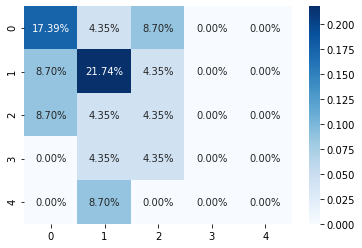

In [39]:
# Mean Accuracy with +/- 2 std deviations
print("Using Nested CV with grid search,accuracy: {0:.2%} +/- {1:.2%}".format(nested_score.mean(), nested_score.std() * 2))
print()
print ("The best hyper-parameters to get this accuracy is :-\n", grid_tree.best_params_)
print()
print ("The best decision tree classifier is :-\n", grid_tree.best_estimator_)
y_pred = grid_tree.best_estimator_.predict(x_test)

#Goodness Measures confusion matrix and other measures like accuracy, precision,recall
cm=confusion_matrix(y_test, y_pred)
print("Confusion Matrix: - \n",cm)
sns.heatmap(cm/np.sum(cm), annot=True,fmt='.2%', cmap='Blues')
print("Classification Report: - \n",classification_report(y_test, y_pred))
print("kappa score : - \n",cohen_kappa_score(y_test, y_pred))
print("Test Accuracy: - \n",accuracy_score(y_test, y_pred))